In [1]:
import numpy as np
import pandas as pd
import joblib

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

In [2]:
train_df = pd.read_csv('./data/fl_2022_FullName_train.csv.gz')
val_df = pd.read_csv('./data/fl_2022_FullName_val.csv.gz')
test_df = pd.read_csv('./data/fl_2022_FullName_test.csv.gz')

In [3]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(7678780, 5)
(959847, 5)
(959848, 5)


## Extract features

In [4]:
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 2), lowercase=False)

In [5]:
X_train = vectorizer.fit_transform(train_df['full_name'])
X_val = vectorizer.transform(val_df['full_name'])
X_test = vectorizer.transform(test_df['full_name'])

In [6]:
X_train.shape

(7678780, 1748)

In [7]:
X_val.shape

(959847, 1748)

In [8]:
X_test.shape

(959848, 1748)

In [29]:
vectorizer.get_feature_names_out()

array([' ', " '", ' -', ..., 'zx', 'zy', 'zz'], dtype=object)

In [30]:
len(vectorizer.get_feature_names_out())

1748

In [31]:
vocab = vectorizer.get_feature_names_out()

In [9]:
y_train = train_df.race_code
y_val = val_df.race_code
y_test = test_df.race_code

In [10]:
y_train[0]

0

In [15]:
#Create a Gaussian Classifier
clf = GradientBoostingClassifier(random_state=42, verbose=6)

In [34]:
print(X_train.shape)
print(X_test.shape)

(7678780, 1748)
(959848, 1748)


## Training

## Doing it for 1 million with 100 iterations

In [17]:
%%time
#Train the model using the training sets y_pred=clf.predict(X_test)

# 1 million
samples = 100 * 100 * 100
# 1 million records took 1h 11min 16s

clf.fit(X_train[:samples], y_train[:samples])

      Iter       Train Loss   Remaining Time 
         1           1.1099           71.88m
         2           1.0904           68.79m
         3           1.0746           68.75m
         4           1.0596           68.75m
         5           1.0475           67.48m
         6           1.0369           67.42m
         7           1.0280           67.15m
         8           1.0205           66.24m
         9           1.0145           65.44m
        10           1.0084           64.97m
        11           1.0037           64.20m
        12           0.9986           63.35m
        13           0.9944           62.67m
        14           0.9903           61.73m
        15           0.9870           61.25m
        16           0.9836           60.55m
        17           0.9806           59.81m
        18           0.9770           59.17m
        19           0.9743           58.36m
        20           0.9714           57.74m
        21           0.9691           57.04m
        2

GradientBoostingClassifier(random_state=42, verbose=6)

In [35]:
%%time
y_pred = clf.predict(X_val)
# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:", metrics.accuracy_score(y_val, y_pred))

Test Accuracy: 0.6809116452934686
CPU times: user 9.15 s, sys: 282 ms, total: 9.43 s
Wall time: 9.43 s


In [36]:
%%time
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))

Test Accuracy: 0.6811036747485019
CPU times: user 9.48 s, sys: 363 ms, total: 9.84 s
Wall time: 9.83 s


In [37]:
joblib.dump(vectorizer, "models/gb_vec_fullname_1M.joblib", compress=3)  # compression is ON!

['models/gb_vec_fullname_1M.joblib']

In [38]:
joblib.dump(clf, "models/gb_model_fullname_1M.joblib", compress=3)  # compression is ON!

['models/gb_model_fullname_1M.joblib']

## Doing it for 2 million with 100 iterations

In [39]:
%%time
#Train the model using the training sets y_pred=clf.predict(X_test)
clf = GradientBoostingClassifier(random_state=42, verbose=6)

# 2 million
samples = 2 * 100 * 100 * 100
# 1 million records took 2h 10min 13s
# 2 million records took 3h 50 mins
# 8 million records will take ~17 hours

clf.fit(X_train[:samples], y_train[:samples])

      Iter       Train Loss   Remaining Time 
         1           1.1098          168.12m
         2           1.0903          163.09m
         3           1.0747          159.94m
         4           1.0600          158.51m
         5           1.0478          156.64m
         6           1.0373          153.27m
         7           1.0284          150.08m
         8           1.0208          147.04m
         9           1.0148          143.91m
        10           1.0088          141.09m
        11           1.0038          139.02m
        12           0.9986          137.11m
        13           0.9944          135.32m
        14           0.9908          133.24m
        15           0.9868          131.26m
        16           0.9832          129.23m
        17           0.9801          127.22m
        18           0.9773          125.46m
        19           0.9743          123.78m
        20           0.9714          122.14m
        21           0.9689          120.19m
        2

GradientBoostingClassifier(random_state=42, verbose=6)

In [40]:
%%time
y_pred = clf.predict(X_val)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.6809595695980714
CPU times: user 12.4 s, sys: 2.53 s, total: 14.9 s
Wall time: 17.1 s


In [41]:
%%time
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6810984655903851
CPU times: user 13.1 s, sys: 999 ms, total: 14.1 s
Wall time: 16.4 s


In [42]:
joblib.dump(vectorizer, "models/gb_vec_fullname_2M.joblib", compress=3)  # compression is ON!

['models/gb_vec_fullname_2M.joblib']

In [43]:
joblib.dump(clf, "models/gb_model_fullname_2M.joblib", compress=3)  # compression is ON!

['models/gb_model_fullname_2M.joblib']

# Now lets do for the whole train dataset with 20 iterations

In [44]:
%%time

clf = GradientBoostingClassifier(n_estimators=20, random_state=42, verbose=6)
clf.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.1100          145.51m
         2           1.0906          128.96m
         3           1.0748          119.62m
         4           1.0605          112.77m
         5           1.0483          104.72m
         6           1.0377           96.84m
         7           1.0286           89.00m
         8           1.0210           82.12m
         9           1.0150           75.65m
        10           1.0089           68.56m
        11           1.0038           61.68m
        12           0.9993           54.65m
        13           0.9948           47.67m
        14           0.9909           40.85m
        15           0.9869           34.07m
        16           0.9837           27.31m
        17           0.9806           20.45m
        18           0.9774           13.62m
        19           0.9743            6.81m
        20           0.9718            0.00s
CPU times: user 2h 8min 42s, sys: 9min 3s, total: 2h 1

GradientBoostingClassifier(n_estimators=20, random_state=42, verbose=6)

In [46]:
%%time
y_pred = clf.predict(X_val)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.6535156123840571
CPU times: user 7.19 s, sys: 1.31 s, total: 8.5 s
Wall time: 12.1 s


In [47]:
%%time
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6535909852393296
CPU times: user 12.6 s, sys: 1.48 s, total: 14.1 s
Wall time: 21.9 s


In [48]:
joblib.dump(vectorizer, "models/gb_vec_fullname.joblib", compress=3)  # compression is ON!

['models/gb_vec_fullname.joblib']

In [49]:
joblib.dump(clf, "models/gb_model_fullname.joblib", compress=3)  # compression is ON!

['models/gb_model_fullname.joblib']

## Confusion Matrix

In [12]:
race_id_df = train_df[['race', 'race_code']].drop_duplicates().sort_values('race_code')
race_to_id = dict(race_id_df.values)

In [13]:
race_to_id

{'nh_white': 0, 'nh_black': 1, 'other': 2, 'hispanic': 3, 'asian': 4}

In [14]:
id_to_race = dict(race_id_df[['race_code', 'race']].values)

In [15]:
id_to_race

{0: 'nh_white', 1: 'nh_black', 2: 'other', 3: 'hispanic', 4: 'asian'}

### For 1M model

In [45]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


              precision    recall  f1-score   support

       asian       0.73      0.10      0.17     27829
    hispanic       0.75      0.53      0.62    169058
    nh_black       0.74      0.08      0.14    149299
    nh_white       0.67      0.96      0.79    573470
       other       0.38      0.00      0.01     40192

    accuracy                           0.68    959848
   macro avg       0.66      0.33      0.35    959848
weighted avg       0.68      0.68      0.61    959848



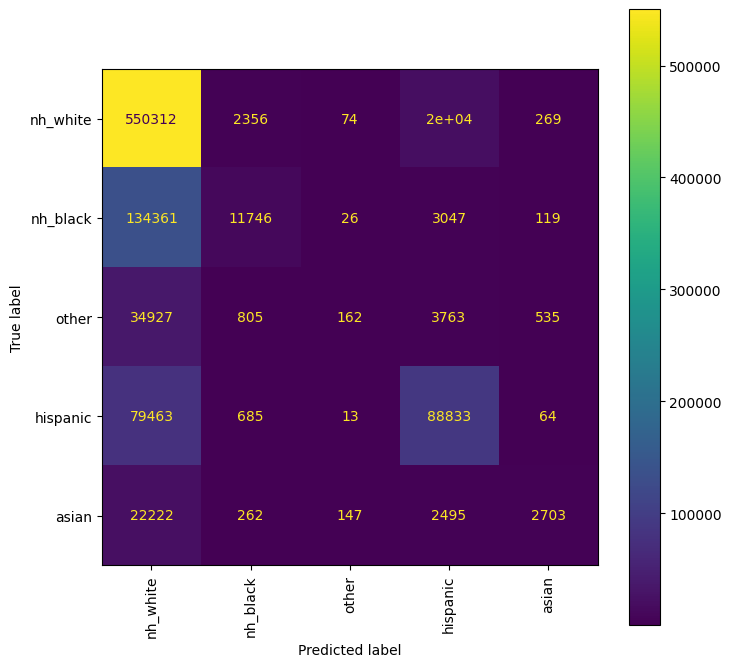

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline  

model_1m = joblib.load('models/gb_model_fullname_1M.joblib')
preds = model_1m.predict(X_test)
predicted = [id_to_race[p] for p in preds]
actual = [id_to_race[p] for p in y_test.values]

print(classification_report(actual, predicted))

cm = confusion_matrix(actual, predicted, labels=list(race_to_id.keys()))
cmp = ConfusionMatrixDisplay(cm, display_labels=list(race_to_id.keys()))
fig, ax = plt.subplots(figsize=(8,8))
cmp.plot(ax=ax, xticks_rotation='vertical')

In [17]:
for class_id in id_to_race:
    correct = np.sum((y_test == class_id) & (preds == class_id))
    total = np.sum(y_test == class_id)
    print(f'Accuracy for class {id_to_race[class_id]}: {correct / total:.2f}')

Accuracy for class nh_white: 0.96
Accuracy for class nh_black: 0.08
Accuracy for class other: 0.00
Accuracy for class hispanic: 0.53
Accuracy for class asian: 0.10


### For 2M Model

              precision    recall  f1-score   support

       asian       0.73      0.10      0.17     27829
    hispanic       0.75      0.53      0.62    169058
    nh_black       0.76      0.08      0.14    149299
    nh_white       0.67      0.96      0.79    573470
       other       0.43      0.00      0.01     40192

    accuracy                           0.68    959848
   macro avg       0.67      0.33      0.35    959848
weighted avg       0.69      0.68      0.61    959848



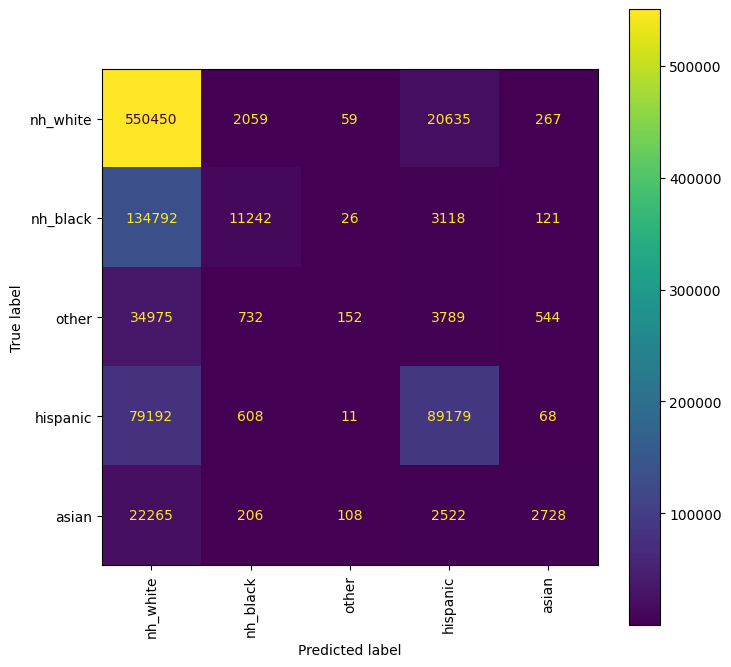

In [18]:
model_2m = joblib.load('models/gb_model_fullname_2M.joblib')
preds = model_2m.predict(X_test)
predicted = [id_to_race[p] for p in preds]
actual = [id_to_race[p] for p in y_test.values]

print(classification_report(actual, predicted))

cm = confusion_matrix(actual, predicted, labels=list(race_to_id.keys()))
cmp = ConfusionMatrixDisplay(cm, display_labels=list(race_to_id.keys()))
fig, ax = plt.subplots(figsize=(8,8))
cmp.plot(ax=ax, xticks_rotation='vertical')

In [19]:
for class_id in id_to_race:
    correct = np.sum((y_test == class_id) & (preds == class_id))
    total = np.sum(y_test == class_id)
    print(f'Accuracy for class {id_to_race[class_id]}: {correct / total:.2f}')

Accuracy for class nh_white: 0.96
Accuracy for class nh_black: 0.08
Accuracy for class other: 0.00
Accuracy for class hispanic: 0.53
Accuracy for class asian: 0.10


### For Model trained  with complete dataset (20 iterations)

              precision    recall  f1-score   support

       asian       0.81      0.04      0.07     27829
    hispanic       0.79      0.37      0.50    169058
    nh_black       0.78      0.01      0.02    149299
    nh_white       0.64      0.98      0.77    573470
       other       0.55      0.00      0.00     40192

    accuracy                           0.65    959848
   macro avg       0.71      0.28      0.27    959848
weighted avg       0.69      0.65      0.56    959848



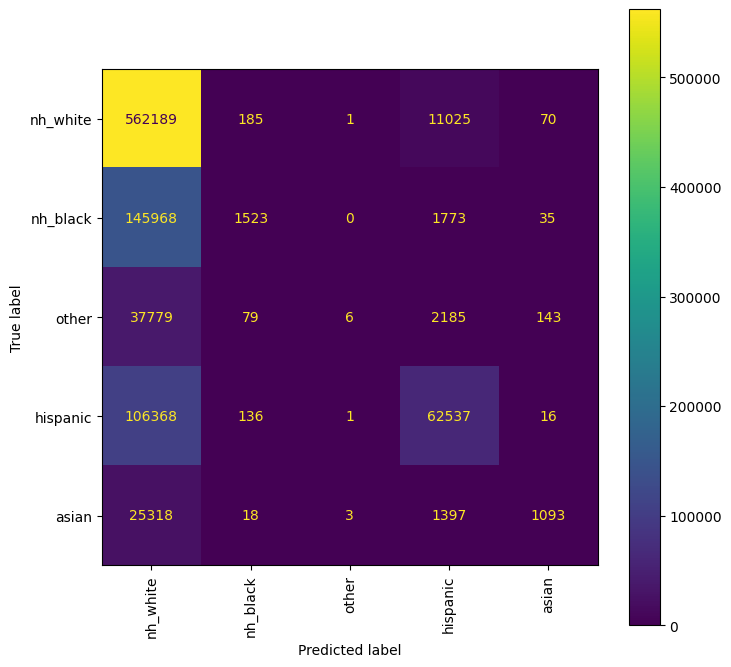

In [20]:
model_full = joblib.load('models/gb_model_fullname.joblib')
preds = model_full.predict(X_test)
predicted = [id_to_race[p] for p in preds]
actual = [id_to_race[p] for p in y_test.values]

print(classification_report(actual, predicted))

cm = confusion_matrix(actual, predicted, labels=list(race_to_id.keys()))
cmp = ConfusionMatrixDisplay(cm, display_labels=list(race_to_id.keys()))
fig, ax = plt.subplots(figsize=(8,8))
cmp.plot(ax=ax, xticks_rotation='vertical')

In [21]:
for class_id in id_to_race:
    correct = np.sum((y_test == class_id) & (preds == class_id))
    total = np.sum(y_test == class_id)
    print(f'Accuracy for class {id_to_race[class_id]}: {correct / total:.2f}')

Accuracy for class nh_white: 0.98
Accuracy for class nh_black: 0.01
Accuracy for class other: 0.00
Accuracy for class hispanic: 0.37
Accuracy for class asian: 0.04
